In [9]:
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

In [10]:
from os import listdir
from os.path import isfile, join
images_paths = sorted([f for f in listdir('images') if isfile(join('images', f))])

In [11]:
def bound_box(image_path):
    # load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    """print(image.shape)
    plt.imshow(gray, 'gray')"""

    # Find contours
    kernel_horizontal_derivative = 1/4 * np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    image_horizontal_derivative = cv2.filter2D(gray, -1, kernel_horizontal_derivative)
    image_horizontal_derivative = np.abs(image_horizontal_derivative)
    kernel_vertical_derivative = 1/4 * np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    image_vertical_derivative = cv2.filter2D(gray, -1, kernel_vertical_derivative)
    image_vertical_derivative = np.abs(image_vertical_derivative)

    image_derivative = np.maximum(image_horizontal_derivative, image_vertical_derivative)

    """plt.figure()
    plt.imshow(image_horizontal_derivative, 'gray')"""
    
    ret2,thresh = cv2.threshold(image_derivative,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (20, 20))
    closed0 = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 120))
    opened = cv2.morphologyEx(closed0, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (100, 1))
    #opened1 = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
    
    kernel = np.zeros((11,11),np.uint8)
    kernel[5,:] = 1
    dilated = cv2.dilate(closed, kernel, iterations = 5)
    
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(cnts)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    #print(rect)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    #print(box)
    # draw a bounding box arounded the detected barcode and display the
    # image
    image_bb = image.copy()
    cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
    plt.figure()
    plt.imshow(image_bb, 'gray')
    
    coordinates_source = box.astype('float32')
    min_width = coordinates_source[:,0].min()
    min_height = coordinates_source[:,1].min()
    max_width = coordinates_source[:,0].max()
    max_height = coordinates_source[:,1].max()
    def normalize(value, axis=0):
        if axis==0:  # Horizontal dimension
            return min_width if (value-min_width<max_width-value) \
                             else max_width
        elif axis==1:  # Vertical dimension
            return min_height if (value-min_height<max_height-value) \
                              else max_height
    coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                                normalize(t[0], axis=0))))
    print(coordinates_source)
    def dist(point1, point2):
        return np.sqrt(np.sum((point1-point2)**2))
    destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                             dist(coordinates_source[1],coordinates_source[3])]))
    destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                             dist(coordinates_source[2],coordinates_source[3])]))
    coordinates_destination = np.array([[0, 0],
                                        [destination_width-1, 0],
                                        [0, destination_height-1],
                                        [destination_width-1, destination_height-1]], dtype='float32')
    # Computing the trasformation, i.e. homography. Warping.
    H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)
    # Applying the trasformation
    gray1 = cv2.warpPerspective(gray, H, (destination_width, destination_height))
    plt.figure()
    plt.imshow(gray1, 'gray')

[[ 403.  262.]
 [1299.  258.]
 [ 408. 1133.]
 [1303. 1129.]]


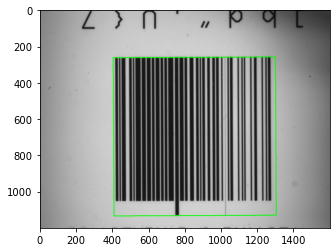

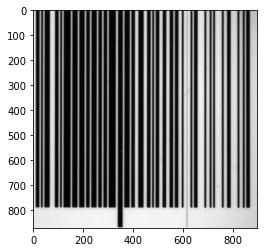

In [12]:
bound_box(f'images/{images_paths[0]}')

[[ 352.  289.]
 [1252.  289.]
 [ 352. 1087.]
 [1252. 1087.]]


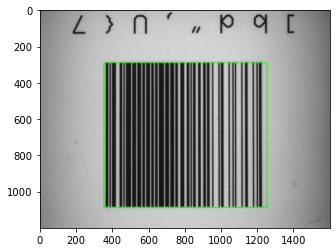

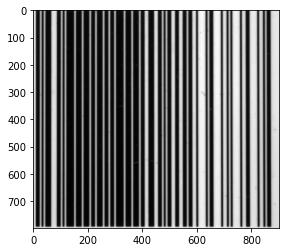

In [13]:
bound_box(f'images/{images_paths[1]}')

[[ 201.  244.]
 [1047.  238.]
 [ 205.  769.]
 [1051.  763.]]


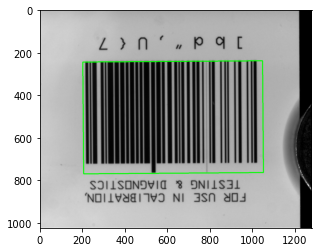

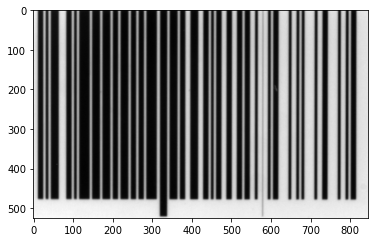

In [14]:
bound_box(f'images/{images_paths[2]}')

[[131. 259.]
 [977. 259.]
 [131. 743.]
 [977. 743.]]


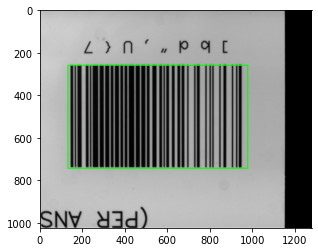

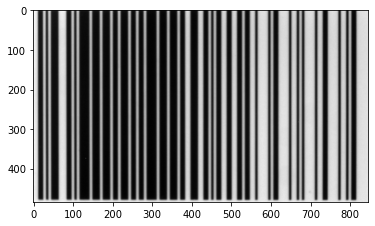

In [15]:
bound_box(f'images/{images_paths[3]}')

[[329. 173.]
 [909. 173.]
 [329. 733.]
 [909. 733.]]


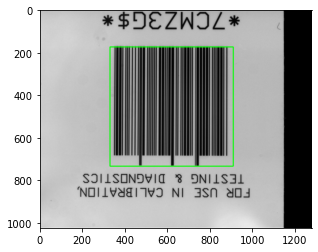

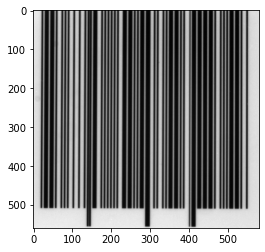

In [16]:
bound_box(f'images/{images_paths[4]}')

[[334. 252.]
 [917. 252.]
 [334. 765.]
 [917. 765.]]


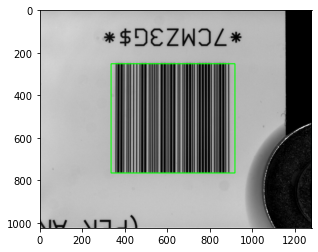

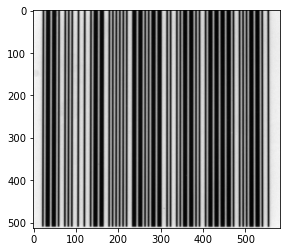

In [17]:
bound_box(f'images/{images_paths[5]}')

[[ 159.  289.]
 [1107.  286.]
 [ 161.  850.]
 [1108.  848.]]


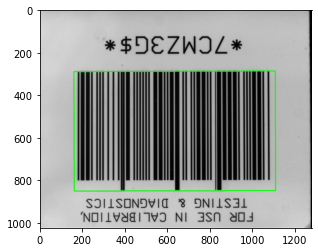

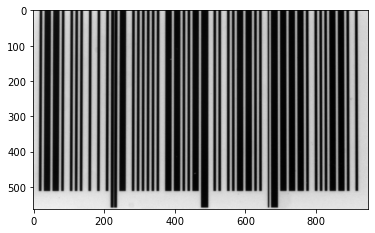

In [18]:
bound_box(f'images/{images_paths[6]}')

[[ 146.  275.]
 [1098.  277.]
 [ 145.  790.]
 [1097.  791.]]


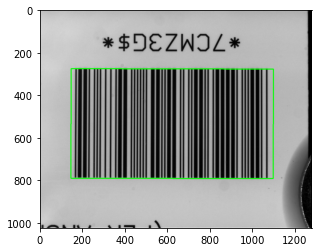

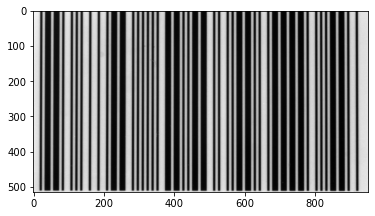

In [19]:
bound_box(f'images/{images_paths[7]}')

[[326. 336.]
 [981. 341.]
 [323. 781.]
 [977. 785.]]


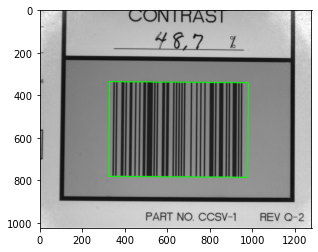

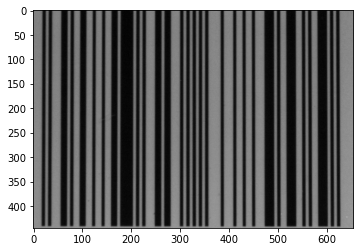

In [20]:
bound_box(f'images/{images_paths[8]}')

[[338. 256.]
 [987. 264.]
 [332. 721.]
 [981. 729.]]


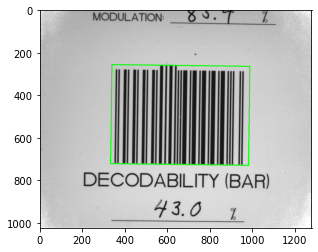

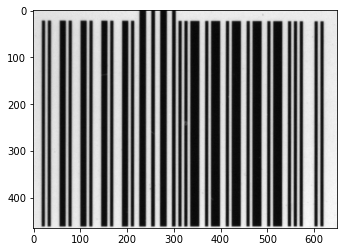

In [21]:
bound_box(f'images/{images_paths[9]}')

In [22]:
print(f'images/{images_paths[10]}')

images/EAN-UPC-DEFECTS IMGB.BMP


In [23]:
#bound_box(f'images/{images_paths[10]}')

[[263. 283.]
 [963. 283.]
 [263. 757.]
 [963. 757.]]


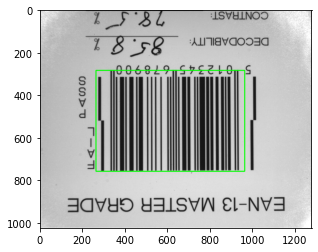

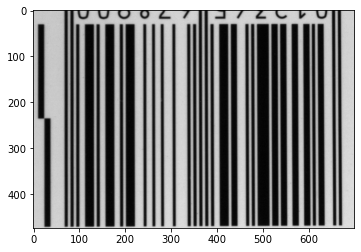

In [24]:
bound_box(f'images/{images_paths[11]}')

[[ 98. 418.]
 [149. 418.]
 [ 98. 956.]
 [149. 956.]]


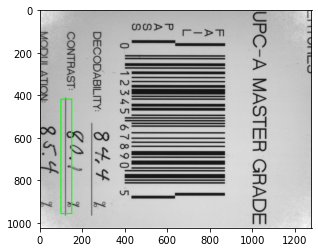

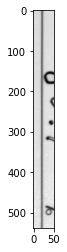

In [25]:
bound_box(f'images/{images_paths[12]}')

[[ 101.  120.]
 [1302.  121.]
 [ 100.  312.]
 [1301.  314.]]


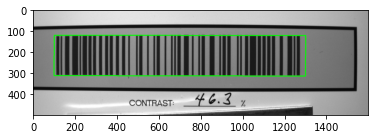

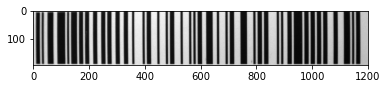

In [26]:
bound_box(f'images/{images_paths[13]}')

[[ 164.  147.]
 [1359.  147.]
 [ 164.  338.]
 [1359.  338.]]


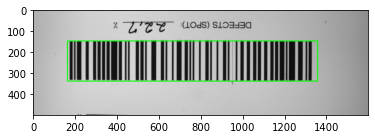

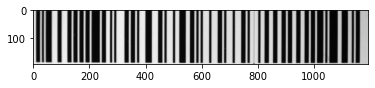

In [27]:
bound_box(f'images/{images_paths[14]}')

[[ 179.  153.]
 [1391.  142.]
 [ 181.  362.]
 [1393.  351.]]


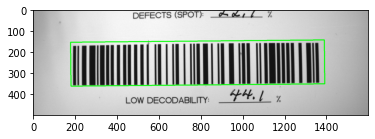

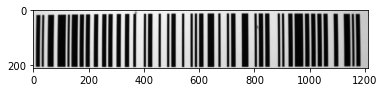

In [28]:
bound_box(f'images/{images_paths[15]}')

[[ 202.  142.]
 [1399.  142.]
 [ 202.  333.]
 [1399.  333.]]


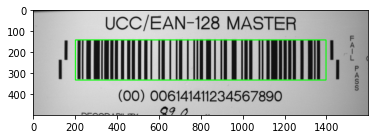

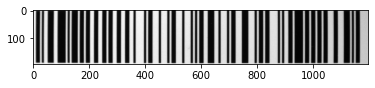

In [29]:
bound_box(f'images/{images_paths[16]}')

[[ 193.  146.]
 [1359.  126.]
 [ 197.  386.]
 [1363.  366.]]


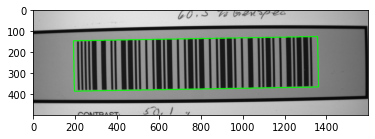

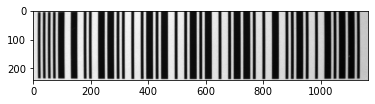

In [30]:
bound_box(f'images/{images_paths[17]}')

[[ 197.  124.]
 [1366.  124.]
 [ 197.  369.]
 [1366.  369.]]


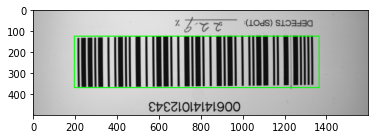

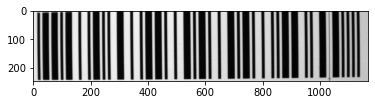

In [31]:
bound_box(f'images/{images_paths[18]}')

[[ 228.   60.]
 [1394.   60.]
 [ 228.  300.]
 [1394.  300.]]


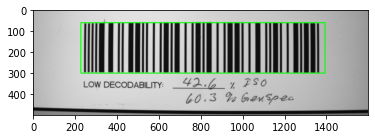

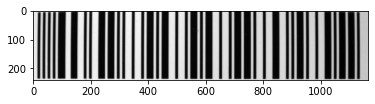

In [32]:
bound_box(f'images/{images_paths[19]}')

[[ 246.  142.]
 [1415.  131.]
 [ 248.  383.]
 [1417.  372.]]


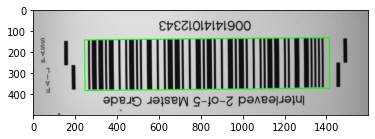

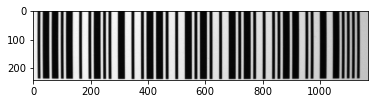

In [33]:
bound_box(f'images/{images_paths[20]}')

In [34]:
print(f'images/{images_paths[21]}')

images/TestChart.xls


In [35]:
#bound_box(f'images/{images_paths[21]}')

[[194. 194.]
 [896. 194.]
 [194. 644.]
 [896. 644.]]


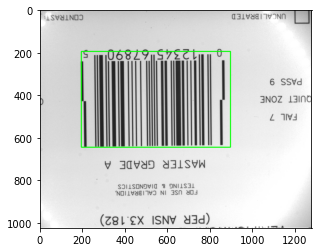

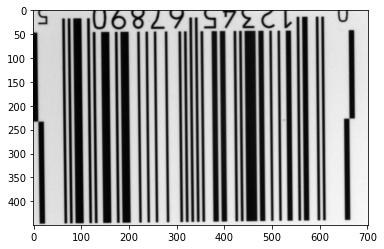

In [36]:
bound_box(f'images/{images_paths[22]}')

[[308. 293.]
 [904. 297.]
 [305. 737.]
 [900. 742.]]


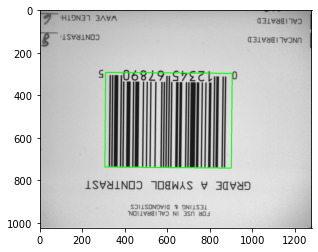

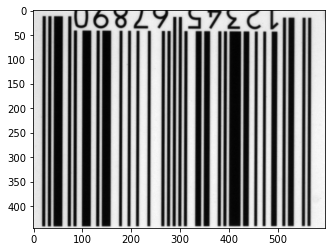

In [37]:
bound_box(f'images/{images_paths[23]}')

[[342. 295.]
 [935. 305.]
 [335. 733.]
 [928. 743.]]


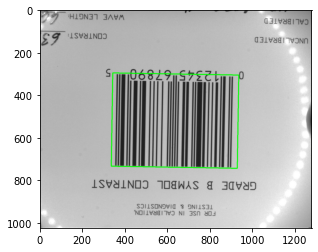

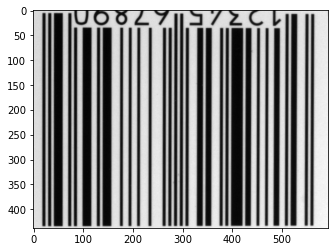

In [38]:
bound_box(f'images/{images_paths[24]}')

[[349. 288.]
 [944. 290.]
 [347. 735.]
 [942. 738.]]


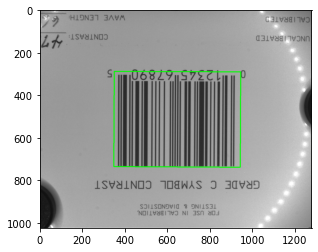

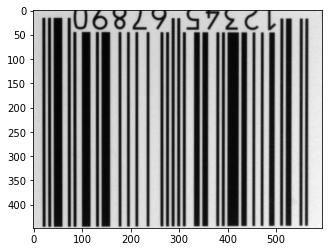

In [39]:
bound_box(f'images/{images_paths[25]}')

[[290. 271.]
 [883. 293.]
 [274. 712.]
 [867. 734.]]


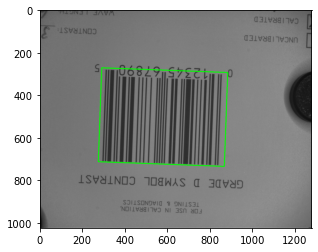

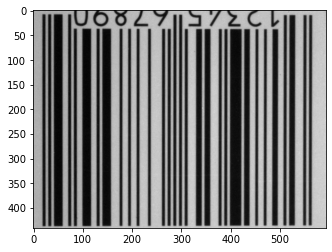

In [40]:
bound_box(f'images/{images_paths[26]}')

[[325. 285.]
 [919. 294.]
 [319. 723.]
 [912. 732.]]


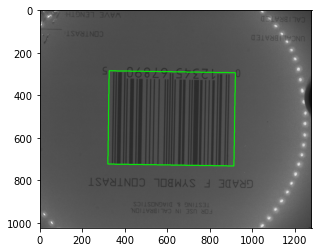

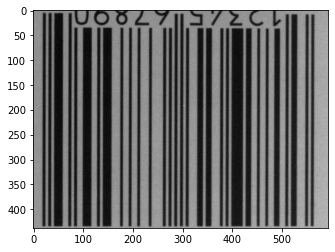

In [41]:
bound_box(f'images/{images_paths[27]}')

[[320. 284.]
 [916. 291.]
 [315. 728.]
 [910. 735.]]


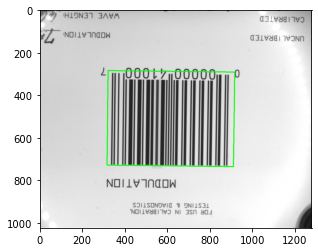

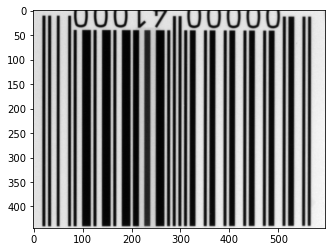

In [42]:
bound_box(f'images/{images_paths[28]}')

[[320. 290.]
 [915. 299.]
 [313. 734.]
 [908. 743.]]


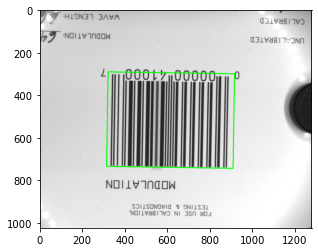

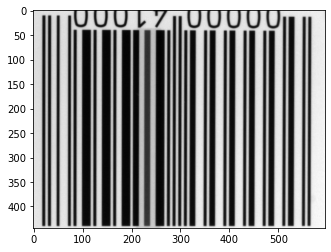

In [43]:
bound_box(f'images/{images_paths[29]}')

[[317. 299.]
 [913. 311.]
 [309. 744.]
 [904. 755.]]


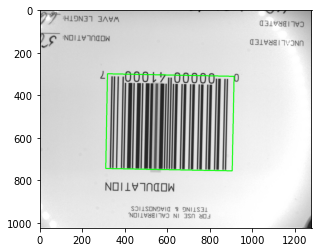

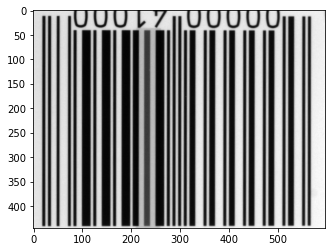

In [44]:
bound_box(f'images/{images_paths[30]}')

[[326. 291.]
 [919. 308.]
 [313. 732.]
 [906. 749.]]


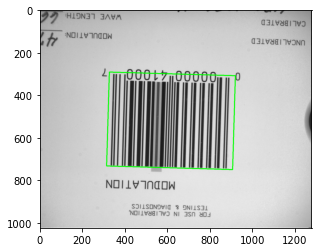

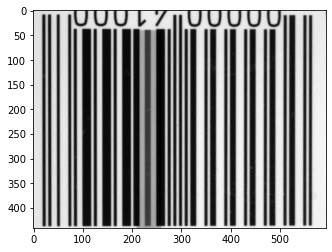

In [45]:
bound_box(f'images/{images_paths[31]}')

[[327. 275.]
 [921. 275.]
 [327. 724.]
 [921. 724.]]


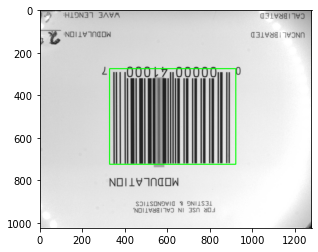

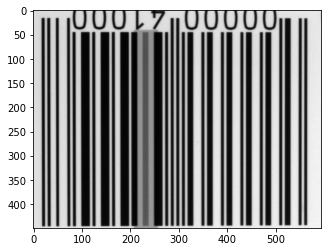

In [46]:
bound_box(f'images/{images_paths[32]}')

[[338. 283.]
 [932. 287.]
 [334. 752.]
 [929. 756.]]


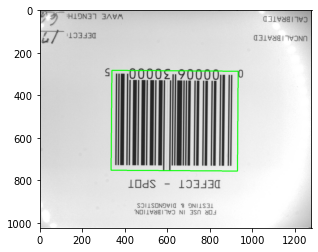

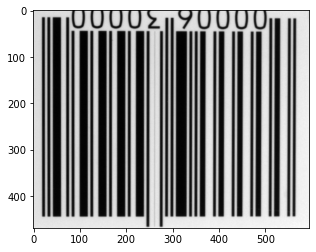

In [47]:
bound_box(f'images/{images_paths[34]}')

[[338. 275.]
 [933. 284.]
 [331. 741.]
 [926. 750.]]


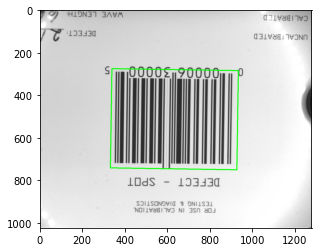

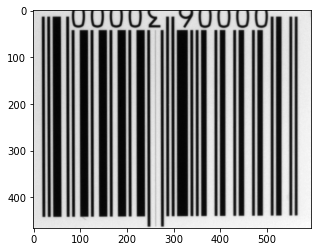

In [48]:
bound_box(f'images/{images_paths[35]}')

[[326. 276.]
 [919. 276.]
 [326. 746.]
 [919. 746.]]


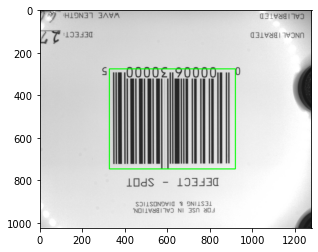

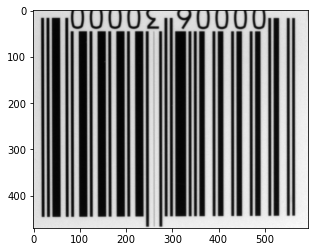

In [49]:
bound_box(f'images/{images_paths[36]}')

[[313. 283.]
 [907. 283.]
 [313. 753.]
 [907. 753.]]


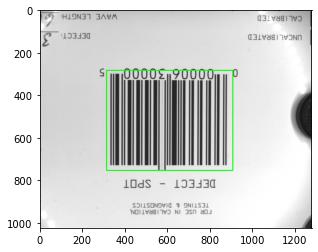

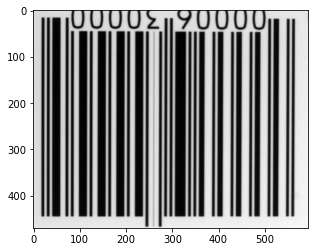

In [50]:
bound_box(f'images/{images_paths[37]}')

[[324. 285.]
 [920. 288.]
 [321. 752.]
 [917. 755.]]


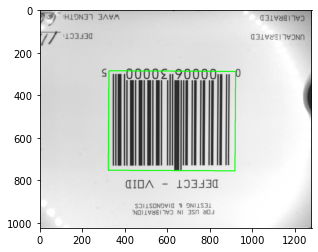

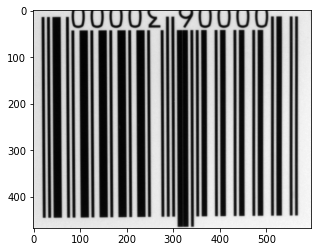

In [51]:
bound_box(f'images/{images_paths[38]}')

[[328. 277.]
 [924. 284.]
 [322. 746.]
 [918. 753.]]


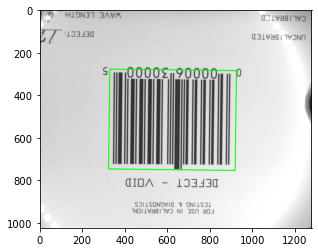

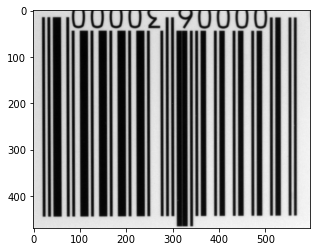

In [52]:
bound_box(f'images/{images_paths[39]}')

[[292. 287.]
 [888. 290.]
 [290. 756.]
 [885. 759.]]


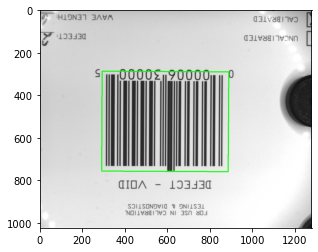

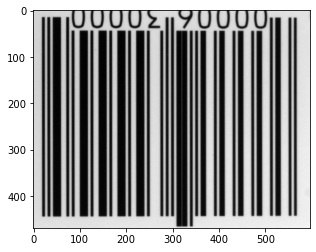

In [53]:
bound_box(f'images/{images_paths[40]}')

[[283. 278.]
 [879. 278.]
 [283. 747.]
 [879. 747.]]


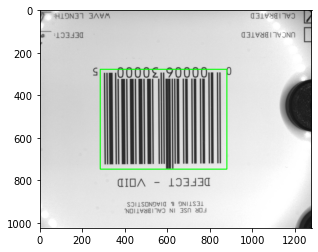

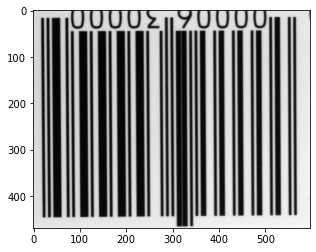

In [54]:
bound_box(f'images/{images_paths[41]}')

[[280. 276.]
 [875. 276.]
 [280. 747.]
 [875. 747.]]


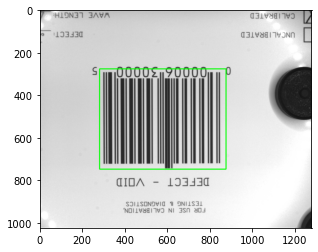

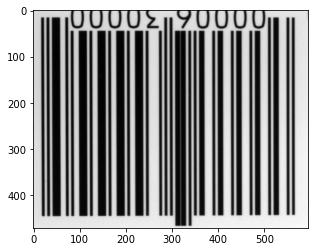

In [55]:
bound_box(f'images/{images_paths[42]}')

[[274. 271.]
 [869. 271.]
 [274. 720.]
 [869. 720.]]


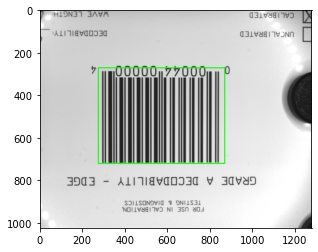

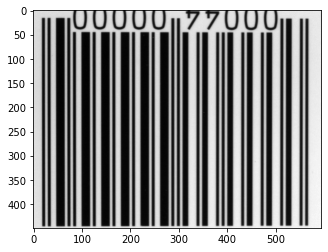

In [56]:
bound_box(f'images/{images_paths[43]}')

[[284. 278.]
 [880. 281.]
 [281. 726.]
 [877. 729.]]


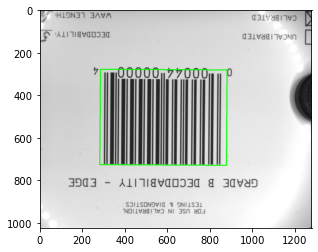

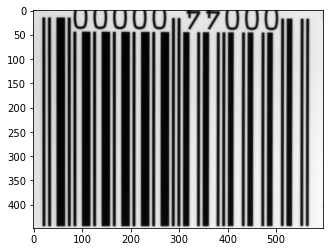

In [57]:
bound_box(f'images/{images_paths[44]}')

[[273. 290.]
 [868. 293.]
 [271. 738.]
 [866. 741.]]


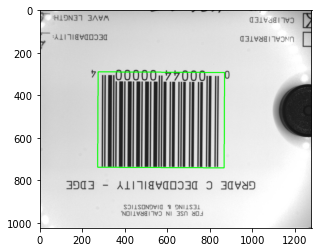

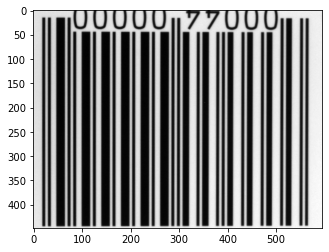

In [58]:
bound_box(f'images/{images_paths[45]}')

[[257. 284.]
 [853. 291.]
 [252. 727.]
 [847. 734.]]


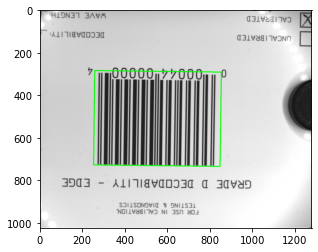

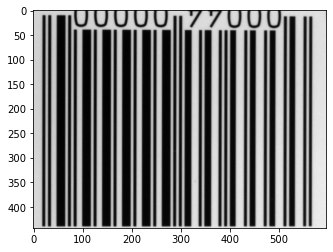

In [59]:
bound_box(f'images/{images_paths[46]}')

[[252. 290.]
 [848. 295.]
 [248. 735.]
 [844. 740.]]


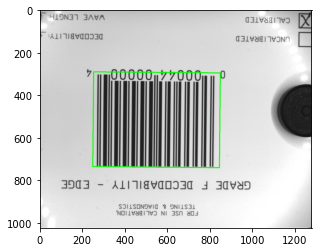

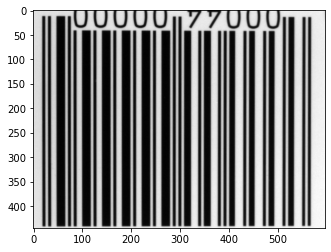

In [60]:
bound_box(f'images/{images_paths[47]}')

[[245. 289.]
 [842. 296.]
 [241. 734.]
 [837. 740.]]


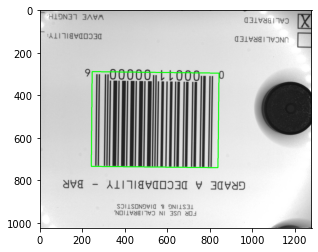

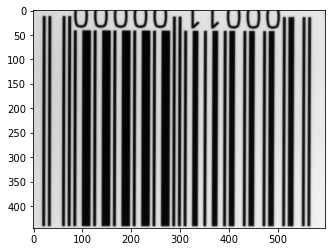

In [61]:
bound_box(f'images/{images_paths[48]}')

[[250. 289.]
 [846. 296.]
 [244. 735.]
 [841. 742.]]


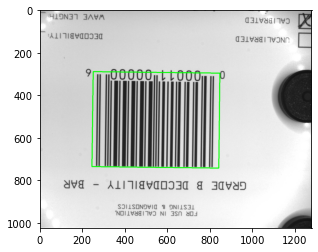

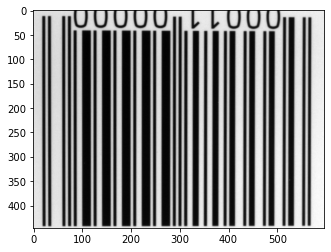

In [62]:
bound_box(f'images/{images_paths[49]}')

[[274. 269.]
 [870. 277.]
 [269. 712.]
 [864. 719.]]


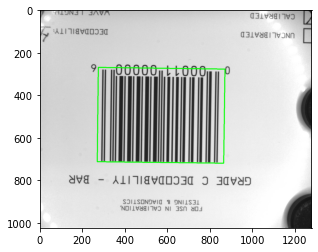

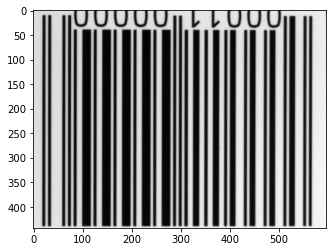

In [63]:
bound_box(f'images/{images_paths[50]}')

[[277. 277.]
 [873. 285.]
 [270. 722.]
 [866. 731.]]


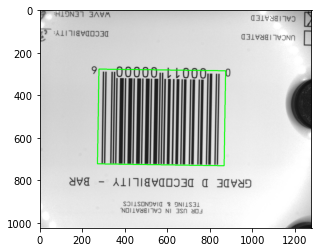

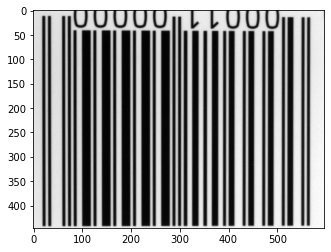

In [64]:
bound_box(f'images/{images_paths[51]}')

[[289. 275.]
 [884. 276.]
 [289. 724.]
 [884. 724.]]


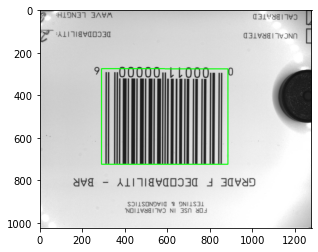

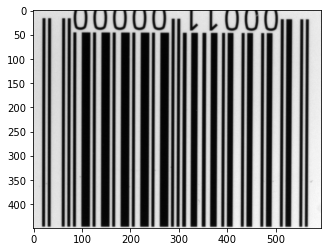

In [65]:
bound_box(f'images/{images_paths[52]}')